In [1]:
%load_ext autoreload
%autoreload 2

from cellmates.data.breast import BreastCancerTissueDataset, get_datasets
from cellmates.data.dataset import CellMatesDataset
from cellmates.utils import MAX_EFFECTIVE_DISTANCE
from tdm.cell_types import FIBROBLAST, MACROPHAGE

import torch
from torch.utils.data import DataLoader

# testing dataset construction:

In [2]:
ds = BreastCancerTissueDataset(
    tissue=1, 
    effective_distance=MAX_EFFECTIVE_DISTANCE, 
    responder_cell_type='F'
)

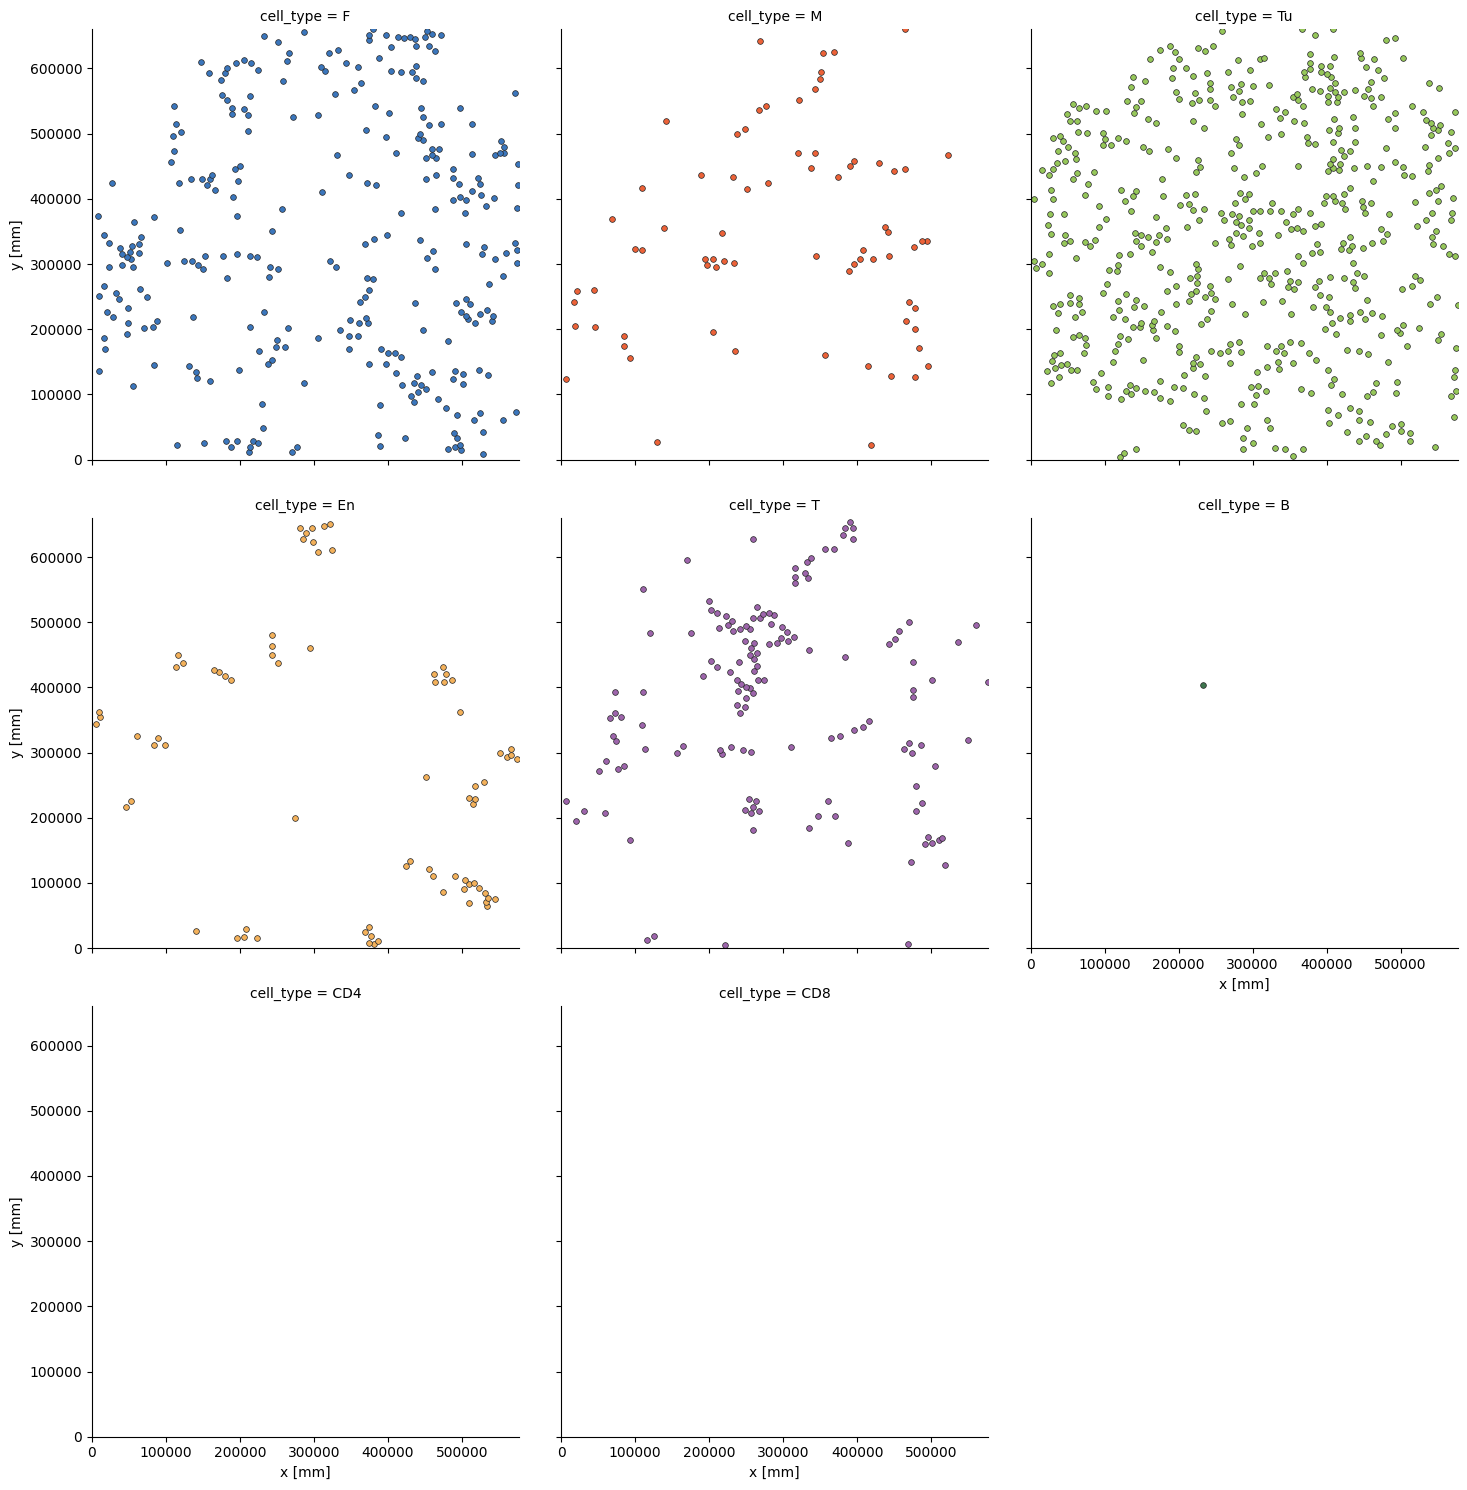

In [28]:
ds.tissue.plot()

In [7]:
ds[4]


        responder_cell_type: 1
        is_dividing: 0
        cell_types: tensor([1, 1, 2, 3, 3, 4, 1, 3, 3, 1, 3, 1, 3, 3, 3, 3, 3, 3, 1, 3, 4, 1, 1, 3,
        3, 3, 1, 1, 4, 3, 4, 4, 1, 4, 1, 3, 3, 1, 3, 3, 4, 4, 3, 1, 3, 4, 3, 1,
        3, 3, 4, 4, 3, 3, 1, 1, 1, 1, 3, 1, 1, 3, 4, 3, 4, 2, 5, 1, 2, 1, 4, 5,
        3, 1, 1, 1, 3, 1, 3, 1, 3, 1, 2, 1, 2, 3, 3, 3, 3, 3, 5, 5, 2, 3, 5, 3,
        3, 3, 1, 3, 3, 1, 1, 5, 5, 2, 1, 5, 3, 3, 3, 3, 5, 3, 3, 1, 3, 1, 1, 1,
        3, 3, 3, 1, 2, 1, 3, 5, 3, 3, 5, 3, 3, 1, 3, 2, 1, 1, 3, 1, 5, 1, 1, 3,
        3, 1, 5, 5, 1, 3, 1, 4, 1, 1, 3, 3, 3, 3, 1, 4, 3, 4, 1, 2, 3, 1, 1, 1,
        2, 3, 1, 3, 3, 1, 3, 4, 5, 3, 1, 3, 3, 4, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3,
        3, 3, 3, 2])
        distances: 
tensor([[  0, 135, 131,  ..., 123, 128, 134],
        [135,   0,  25,  ..., 258, 260, 268],
        [131,  25,   0,  ..., 255, 253, 266],
        ...,
        [123, 258, 255,  ...,   0,  46,  18],
        [128, 260, 253,  ...,  46,   0,  62],
 

In [1]:
ds = get_datasets(responder_cell_type=FIBROBLAST, effective_distance=MAX_EFFECTIVE_DISTANCE, concatenated=True)

NameError: name 'get_datasets' is not defined

In [3]:
ds = BreastCancerTissueDataset(
    tissue=1, 
    effective_distance=MAX_EFFECTIVE_DISTANCE, 
    responder_cell_type='F'
)

samples = [s for s in ds]

ds = CellMatesDataset(samples)

In [19]:
from tdm.tissue import StubTissue
from tdm.utils import microns

st = StubTissue(
    cell_types=[FIBROBLAST, MACROPHAGE],
    cell_type_xy_tuples=[
        (FIBROBLAST, microns(500), microns(500), 0), # located at 500,500, not dividing
        (FIBROBLAST, microns(500), microns(500), 0),
        (FIBROBLAST, microns(500), microns(300), 0),
        (FIBROBLAST, microns(500), microns(600), 1)
    ],
    tissue_dimensions=(microns(1000), microns(1000))
)
ds = BreastCancerTissueDataset(
    tissue=st, 
    effective_distance=MAX_EFFECTIVE_DISTANCE, 
    responder_cell_type=FIBROBLAST
)

In [21]:
ds[3]


        responder_cell_type: 1
        is_dividing: 1
        cell_types: tensor([1, 1, 1])
        distances: 
tensor([[  0, 100, 100],
        [100,   0,   0],
        [100,   0,   0]])
        